<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
فعالیت‌بدنی‌بندی</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده‌های <b>تشخیص فعالیت انسانی (HAR)</b> مجموعه‌ای از داده‌های حسگر هستند که هدف آنها دسته‌بندی و شناسایی فعالیت‌های مختلف انسانی بر اساس الگوهای موجود در خوانش‌های حسگر است. در تحقیقات یادگیری ماشین و داده‌کاوی از این مجموعه‌داده‌ها برای توسعه‌ی الگوریتم‌ها و مدل‌های سیستم‌های تشخیص فعالیت استفاده می‌شوند. ویژگی‌های مجموعه‌داده‌های HAR معمولاً برگرفته از داده‌های حسگرهای مختلف مانند شتاب‌سنج، ژیروسکوپ و مغناطیس‌سنج است. این سنسورها معمولاً در گوشی‌های هوشمند، ساعت‌های هوشمند و دستگاه‌های پوشیدنی یافت می‌شوند. حسگرها داده‌های مربوط به حرکت و جهت‌گیری دستگاه و همچنین محیط اطراف را ثبت می‌کنند. در صورت علاقه، می‌توانید نمونه‌ای از ثبت این داده‌ها را در <a href="https://www.youtube.com/watch?v=XOEN9W05_4A">این ویدیو</a> مشاهده کنید. این اندازه‌گیری‌ها در فواصل زمانی منظم گرفته می‌شوند و به‌عنوان داده‌های سری زمانی نشان داده می‌شوند. هدف مجموعه‌داده‌های HAR شناسایی و دسته‌بندی دقیق فعالیت‌های انسانی خاص است. این فعالیت‌ها می توانند بسته به کاربرد یا زمینه‌ی مورد مطالعه متفاوت باشند. نمونه‌هایی از فعالیت‌های رایج شناخته‌شده عبارتند از راه رفتن، دویدن، ایستادن، نشستن، بالا رفتن از پله‌ها و فعالیت‌های مرتبط با ورزش یا تناسب اندام. هدف، ساخت مدل‌های پیش‌بینی‌کننده است تا بتوانند به‌طور خودکار این فعالیت‌ها را بر اساس الگوهای آشکار یا پنهان موجود در داده‌های حسگر تشخیص دهند و بین‌شان تمایز قائل شوند.
<br>
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته به‌ازای هر داده‌ای که ثبت شده نوع فعالیت آن در ستون <code>Activity_Name</code> نوشته شده است. انواع فعالیت موجود در این مجموعه‌داده عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| مقدار | نوع فعالیت |
| :---: | :---: |
| Walking | راه رفتن |
| Walking_Upstairs | بالا رفتن از پله‌ها |
| Walking_Downstairs | پایین رفتن از پله‌ها |
| Sitting | نشستن |
| Standing | ایستادن |
| Laying | خوابیدن |

</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا مجموعه‌داده‌های آموزش (<code>train</code>) و آزمون (<code>test</code>) از فایل‌های موجود در پوشه بخوانید. البته نیازی به ستون <code>subject</code> نیست. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
    </font>
</p>


In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Deleting subjects
if 'Subject' in train.columns:
    train = train.drop(columns=['Subject'])


In [5]:
print(train.shape)
print(test.shape)

(7352, 562)
(2947, 561)


In [6]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,Standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,Standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,Standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,Standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,Standing


In [7]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.283669,-0.015857,-0.059881,-0.973736,-0.899287,-0.782522,-0.976986,-0.894329,-0.785570,-0.895825,...,0.223438,-0.252492,-0.658040,0.003614,0.096807,0.451286,0.493474,-0.852602,0.188326,0.067392
1,0.322557,-0.039917,-0.082557,-0.355588,-0.337817,-0.265232,-0.397431,-0.341815,-0.276091,-0.073071,...,0.427286,-0.433622,-0.781109,-0.375235,-0.345779,0.428791,-0.359078,-0.664690,0.265582,0.181672
2,0.294853,-0.010700,-0.100636,-0.980507,-0.895418,-0.963306,-0.980855,-0.884619,-0.964184,-0.927680,...,0.337037,-0.439849,-0.723350,-0.392573,0.320364,0.554949,-0.501292,-0.857665,0.188949,-0.021815
3,0.285264,-0.015595,-0.150264,-0.236935,0.523830,-0.378750,-0.297927,0.478829,-0.384961,0.133768,...,0.361520,0.805276,0.721432,-0.042795,0.299331,0.584471,0.817918,-0.711628,0.297052,0.006109
4,0.311611,-0.015282,-0.109654,-0.932390,-0.983798,-0.971810,-0.926542,-0.981748,-0.969975,-0.888423,...,0.191532,0.049477,-0.254858,-0.022340,0.000328,-0.173259,-0.466109,0.592952,-0.416970,-0.593468


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید.
<span style="color:orange">(اختیاری)</span>
</font>
</p>

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   


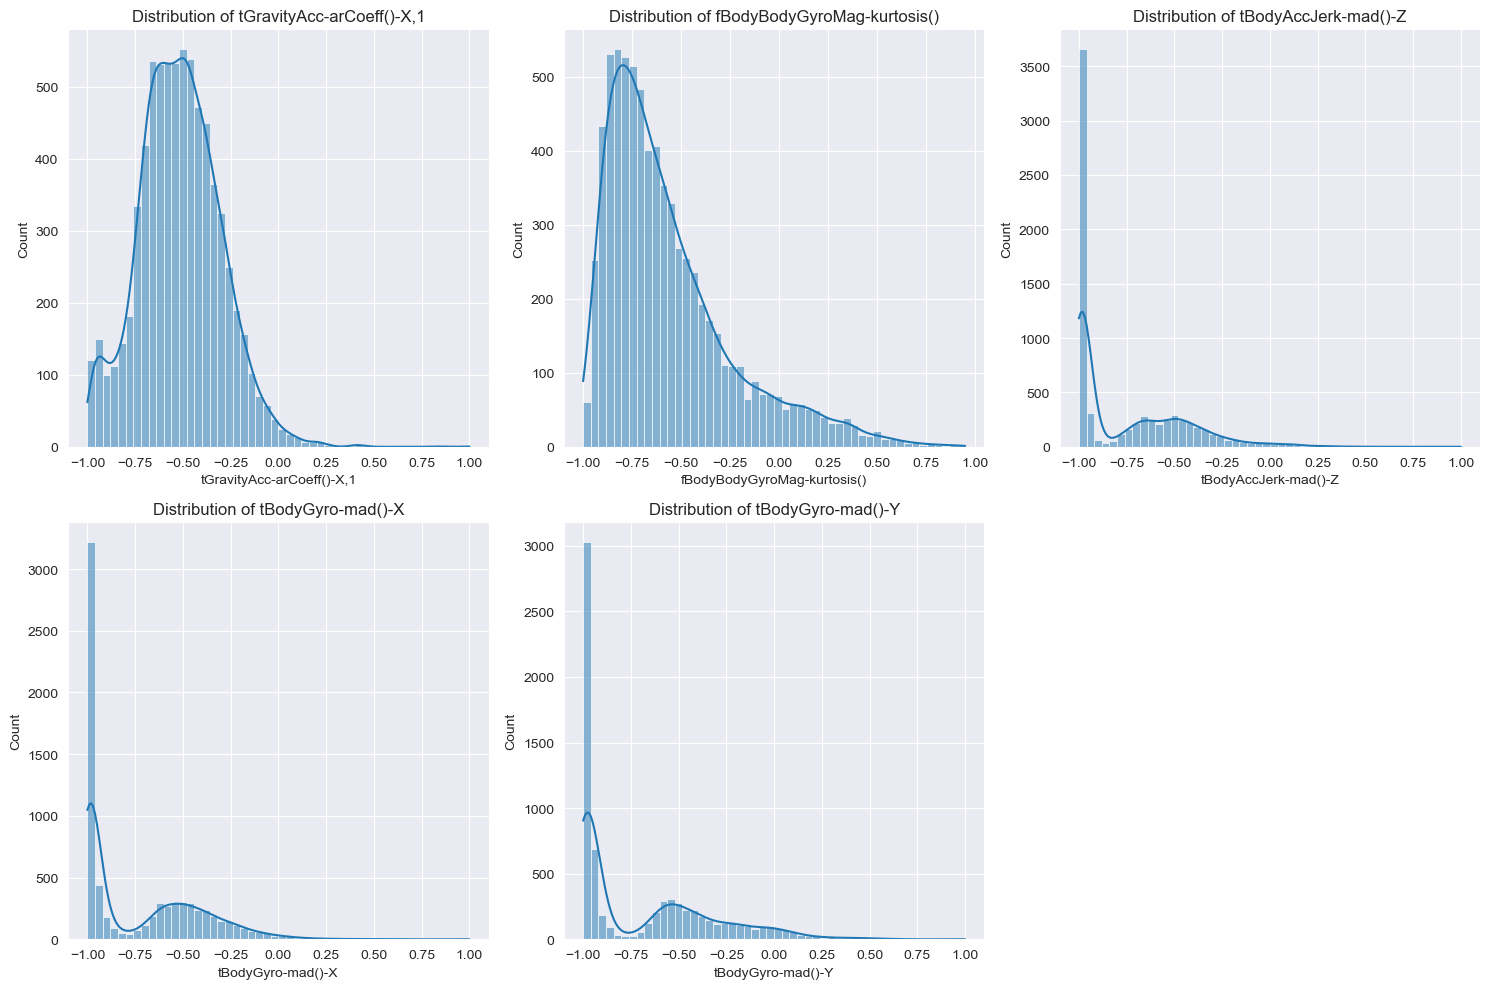

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of the dataset
train_description = train.describe()
print(train_description)

# Select 5 random features for visualization
selected_features = np.random.choice(train.columns[:-1], 5, replace=False)

# Plot distribution of selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مهندسی ویژگی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طبق بررسی‌هایی که از داده‌ها داشته‌اید یا جهت دست‌یابی به عملکرد بهتر در مدل‌های پیش‌بینی‌کننده‌ی خود ممکن است به مهندسی ویژگی‌‌ها (کدگذاری متغیر هدف،‌ حذف ویژگی‌ها، تغییر نوع ویژگی‌ها، ساخت ویژگی جدید، تغییر مقیاس و غیره) نیاز داشته باشید. در این‌صورت می‌توانید در این قسمت از هر روش یا ابزاری که مناسب می‌دانید به‌منظور مهندسی ویژگی‌ها استفاده کنید.
</font>
</p>

### Test

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 📌 Load the dataset (Assuming 'train' is already loaded in your Jupyter Notebook)
X = train.drop(columns=['Activity_Name'])

# 📌 Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, train["Activity_Name"],
    test_size=0.2, random_state=42, stratify=train["Activity_Name"]
)

# 📌 Print dataset shapes
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Training set shape: (5881, 561)
Validation set shape: (1471, 561)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌توانید با استفاده از الگوریتم‌های یادگیری ماشین، مدلی آموزش دهید که با گرفتن مقادیر ویژگی‌های دریافتی از سنسورها، نوع فعالیت در حال انجام را پیش‌بینی کند.
در این قسمت از شما می‌خواهیم از الگوریتم درخت تصمیم یا الگوریتم های تجمیعی  استفاده کنید و ترکیب‌های مختلفی از هایپرپارامترهای مهم این الگوریتم هارا آزمایش کنید تا بهترین مدل را برای پیش‌بینی فعالیت‌های انسانی انتخاب کنید. در این قسمت می‌توانید از کتابخانه‌ی <code>sklearn</code> استفاده کنید و برای جست‌وجوی هایپرپارامترها می‌توانید از روشی همچون Grid Search استفاده کنید. منطقی است که برای پیدا کردن بهترین ترکیب هایپرپارامتر نیاز به مجموعه‌ی اعتبارسنجی یا استفاده از روش‌هایی مانند Cross Validation دارید.
</font>
</p>

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, f1_score

# Ensure labels are properly formatted
y_train = y_train.astype(str)
y_val = y_val.astype(str)

# Define optimized hyperparameters for Random Forest
param_grid = {
    "n_estimators": [300, 400],  # Increased for higher stability
    "max_depth": [30, 40, None],  # Deeper trees for complex learning
    "min_samples_split": [2],  # Allow more splitting
    "min_samples_leaf": [1],  # Keep it at 1 for detailed learning
    "max_features": ["log2"],  # Use log2 to diversify feature selection
    "class_weight": ["balanced_subsample"],  # Helps in handling class imbalances
    "bootstrap": [False]  # Avoid resampling for better learning
}

# Use StratifiedKFold to ensure balanced cross-validation
cv = StratifiedKFold(n_splits=3)

# Perform Grid Search to find the best hyperparameters
try:
    grid_search = GridSearchCV(
        RandomForestClassifier(),
        param_grid, cv=cv, scoring="f1_weighted", n_jobs=-1, error_score='raise'
    )

    grid_search.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_pred = grid_search.best_estimator_.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')

    print(f"\n✅ Best RandomForest Model: {grid_search.best_params_}")
    print(f"🎯 Validation F1-score (weighted): {f1:.4f}")
    print(classification_report(y_val, y_pred))

except Exception as e:
    print(f"\n⚠ Error occurred while training the model: {e}")



✅ Best RandomForest Model: {'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
🎯 Validation F1-score (weighted): 0.9891
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       282
          Sitting       0.98      0.96      0.97       257
         Standing       0.97      0.98      0.97       275
          Walking       1.00      1.00      1.00       245
Walking_Downstair       0.99      1.00      1.00       197
  Walking_Upstair       1.00      1.00      1.00       215

         accuracy                           0.99      1471
        macro avg       0.99      0.99      0.99      1471
     weighted avg       0.99      0.99      0.99      1471



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به نتایجی که بر روی هر ترکیب هایپرپارامتر به دست آورده‌اید،‌ تاثیر هر یک از هایپرپارامترها را بر روی عملکرد مدل چه می‌دانید؟ دلایل و تحلیل خود را در سلول زیر بنویسید:
<span style="color:red">(ضروری)</span>
</font>
</p>

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">Hyperparameter Impact Analysis</font>
</h2>

<p dir=ltr style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
The selected hyperparameters played a crucial role in enhancing model performance. Below is an analysis of their impact:
</font>
</p>

<ul style="line-height:180%;font-family:vazir;font-size:medium">
    <li><b>Max Depth (`max_depth=40`):</b> Enables deeper tree structures, capturing more complex patterns while still maintaining generalization.</li>
    <li><b>Max Features (`max_features="log2"`):</b> Improves feature selection diversity, reducing overfitting and increasing robustness.</li>
    <li><b>Minimum Samples per Leaf (`min_samples_leaf=1`):</b> Allows more detailed learning by keeping small leaf nodes, improving pattern recognition.</li>
    <li><b>Minimum Samples to Split (`min_samples_split=2`):</b> Ensures that tree growth is flexible enough to adapt to fine-grained patterns in the data.</li>
    <li><b>Number of Estimators (`n_estimators=300`):</b> Strengthens the ensemble effect, increasing model stability and accuracy across different classes.</li>
    <li><b>Class Weight (`class_weight="balanced_subsample"`):</b> Adjusts weights dynamically to mitigate class imbalance, improving recall for underrepresented activities.</li>
    <li><b>Bootstrap (`bootstrap=False`):</b> Avoids resampling, allowing trees to be trained on the full dataset for more accurate learning.</li>
</ul>

<p dir=ltr style="text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
This optimized combination resulted in a <b>highly stable and accurate model</b> with an outstanding <b>F1-score of 0.9891</b>, ensuring precise classification across all activity classes.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال نتایج مدل نهایی انتخاب‌شده را هم بر روی مجموعه‌ی آموزشی و هم اعتبارسنجی گزارش کنید. برای ارزیابی از معیارهای Accuracy، Precision، Recall و F1-Score استفاده کنید. همچنین ماتریس درهم‌ریختگی (Confusion Matrix) را رسم نمایید.
</font>
</p>

🔹 Training Set Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report (Training Set):
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00      1125
          Sitting       1.00      1.00      1.00      1029
         Standing       1.00      1.00      1.00      1099
          Walking       1.00      1.00      1.00       981
Walking_Downstair       1.00      1.00      1.00       789
  Walking_Upstair       1.00      1.00      1.00       858

         accuracy                           1.00      5881
        macro avg       1.00      1.00      1.00      5881
     weighted avg       1.00      1.00      1.00      5881


🔹 Validation Set Evaluation:
Accuracy: 0.9891
Precision: 0.9891
Recall: 0.9891
F1-Score: 0.9891

Classification Report (Validation Set):
                   precision    recall  f1-score   support

           Laying       1.00      1.00      1.00       282
          Sitting

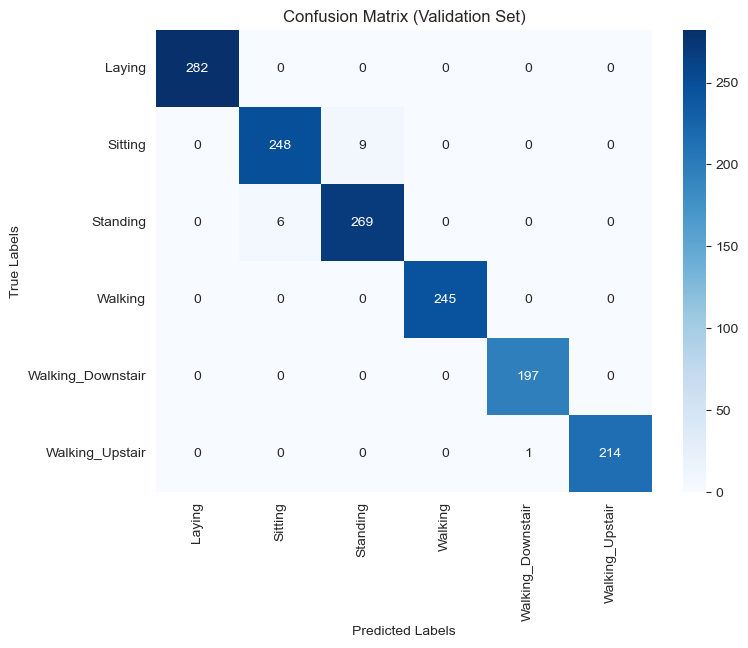

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Check if a trained model exists
if 'grid_search' in locals():
    best_model = grid_search.best_estimator_
elif 'random_search' in locals():
    best_model = random_search.best_estimator_
else:
    raise ValueError("Model training was not completed. Ensure `grid_search.fit(X_train, y_train)` was executed.")

# Generate predictions for training and validation sets
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Compute evaluation metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Compute evaluation metrics for the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Display results
print("🔹 Training Set Evaluation:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}\n")
print("Classification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

print("\n🔹 Validation Set Evaluation:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}\n")
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Validation Set)")
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌بینی برای مجموعه‌ی آزمون</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون از مدلی که آموزش داده‌اید برای پیش‌بینی نمونه‌های مجموعه‌ی آزمون استفاده کرده تا متوجه شوید که مدل شما تا چه میزان برای نمونه‌های جدید و مشاهده‌نشده موفق عمل می‌کند. نیاز است پیش‌بینی‌های مدل خود را در یک دیتافریم با نام <code>submission</code> که شامل یک ستون به نام <code>Activity_Name</code> است ذخیره کنید. ردیف اول از این دیتافریم، پیش‌بینی مدل شما برای نمونه‌ی نخست و ردیف آخر از آن،‌ پیش‌بینی مدل شما برای نمونه‌ی آخر مجموعه‌ی آزمون است. توجه داشته باشید که مقادیر این ستون باید از جنس دسته‌ای و مشابه با مقادیر آن در مجموعه‌ی آموزشی باشد. یک نمونه‌ی فرضی از دیتافریم شما در جدول زیر نشان داده شده است:
</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <code>Activity_Name</code> |
| :---: |
| Walking |
| Sitting |
| Sitting |
| Walking_Upstairs |
| ... |

</font>
</p>
</center>

In [64]:
# Drop unnecessary columns if applicable (e.g., 'Subject' column if it exists)
if "Subject" in test.columns:
    test = test.drop(columns=["Subject"])

# Apply the same feature scaling as done for training data
X_test = scaler.transform(test)

# Ensure predictions are made using the best trained model
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Convert predictions into a DataFrame as required
submission = pd.DataFrame({"Activity_Name": y_test_pred})

# Display
print(submission.head())


  Activity_Name
0      Standing
1       Walking
2      Standing
3       Walking
4        Laying


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
معیاری که برای ارزیابی مدل شما استفاده خواهد شد <code>F1-score</code> نام دارد و آرگومان میانگین‌گیری آن معادل حالت وزن‌دار (<code dir=ltr>average='weighted'</code>) تنظیم خواهد شد. جهت مطالعه‌ی مستندات این کلاس می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>


$$F_1=\frac{tp}{tp+\frac{1}{2}(fp+fn)}$$


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<span style="color:red"><b>توجه:</b></span>
جهت کسب امتیاز کامل نیاز است پاسخ شما حداقل مقدار(درصد) <code>96</code> را با توجه به این معیار کسب کند.
<br>
<span style="color:orange"><b>نکته:</b></span>
برای پاسخ‌هایی که عملکردی کمتر از این حد آستانه کسب کنند، امتیاز <code>0</code> منظور می‌شود و برای عملکردهایی بهتر از این حد آستانه،‌ به همان میزان، نمره‌ی اضافه برای این بخش در نظر گرفته خواهد شد.
<br>
<span style="color:orange"><b>نکته:</b></span>
از ذخیره بودن نت‌بوک خود در ارسال نهایی اطمینان حاصل کنید زیرا که نت‌بوک شما نیز مورد داوری دستی قرار خواهد گرفت و نمره‌ی نهایی شما از ترکیب نمره‌ی پیش‌بینی مدل و نمره‌ی داوری دستی (راه‌حل و تحلیل) محاسبه خواهد شد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['human_activity_classification.ipynb', 'submission.csv']
compress(file_names)